<a href="https://colab.research.google.com/github/ibader85/AdvancedAnalytics/blob/main/TensorFlow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

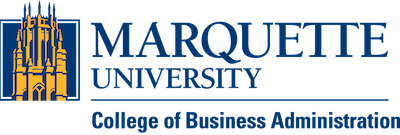

# BUAN 4061: Advanced Business Analytics
# TensorFlow 1

Instructor: Dr. Badar Al Lawati

**Acknowledgment**: This material is based on the content provided by `Daniel Bourke` in his course: [Learn TensorFlow and Deep Learning fundamentals with Python](https://www.youtube.com/watch?v=tpCFfeUEGs8&t=50s)

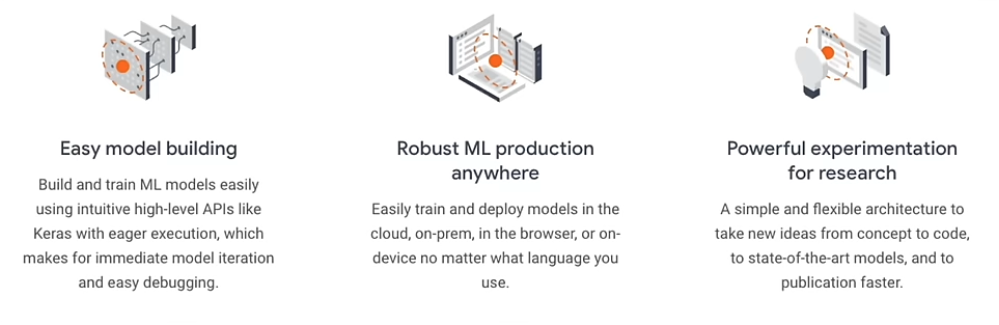

![Tensors.png](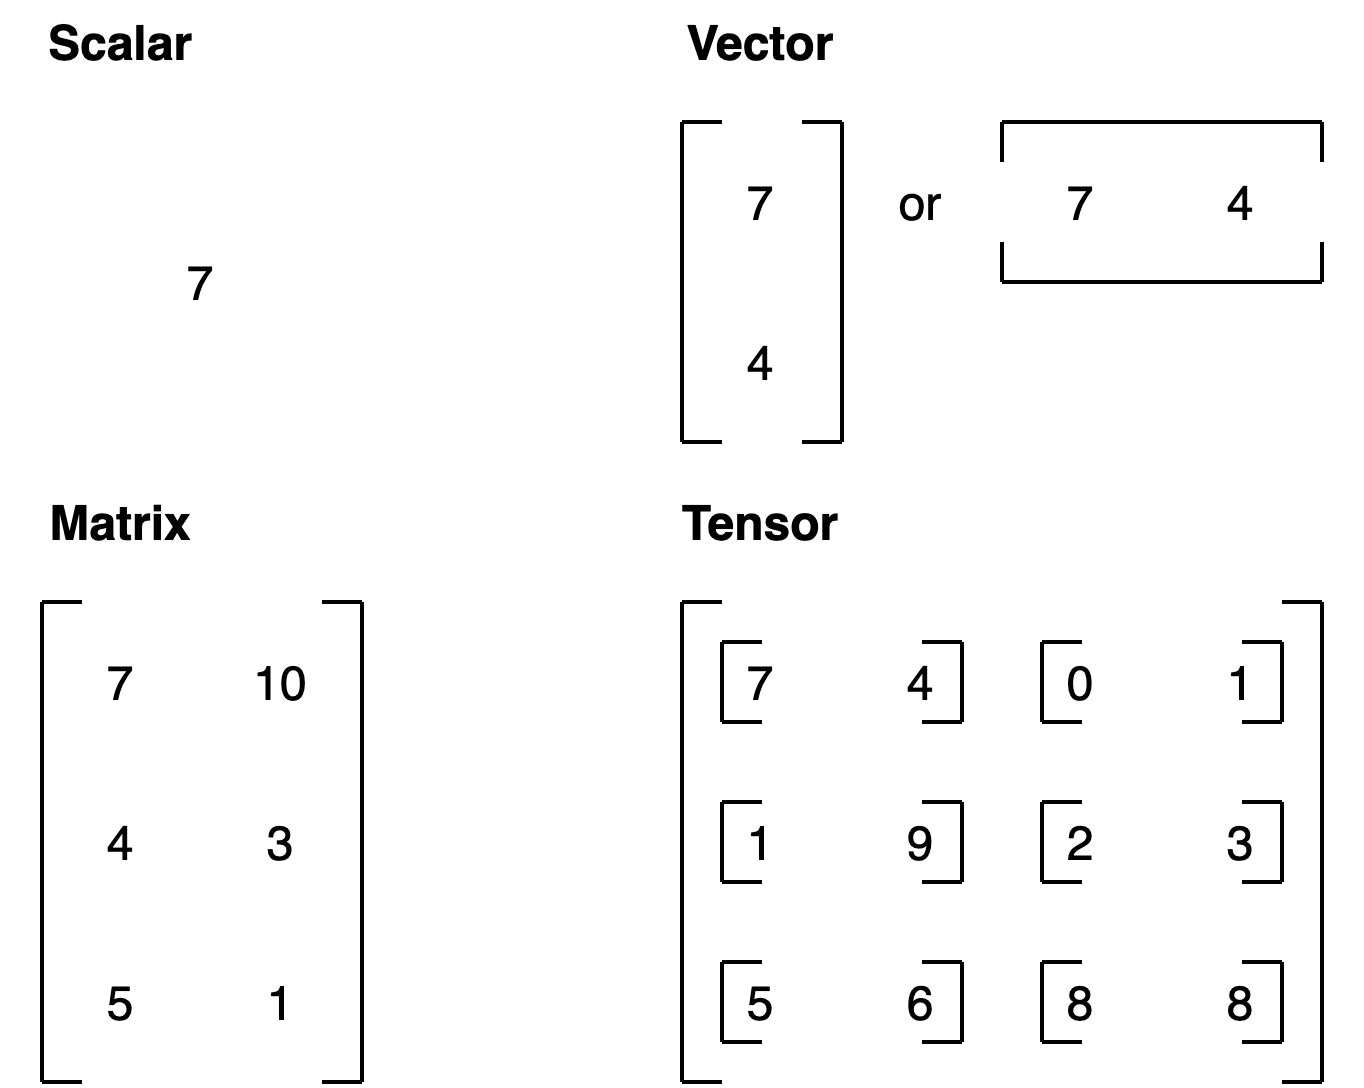![Tensors.jpg](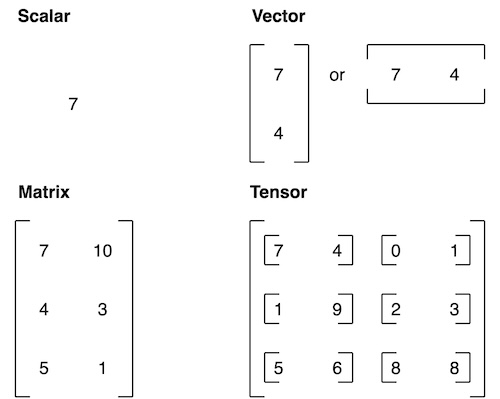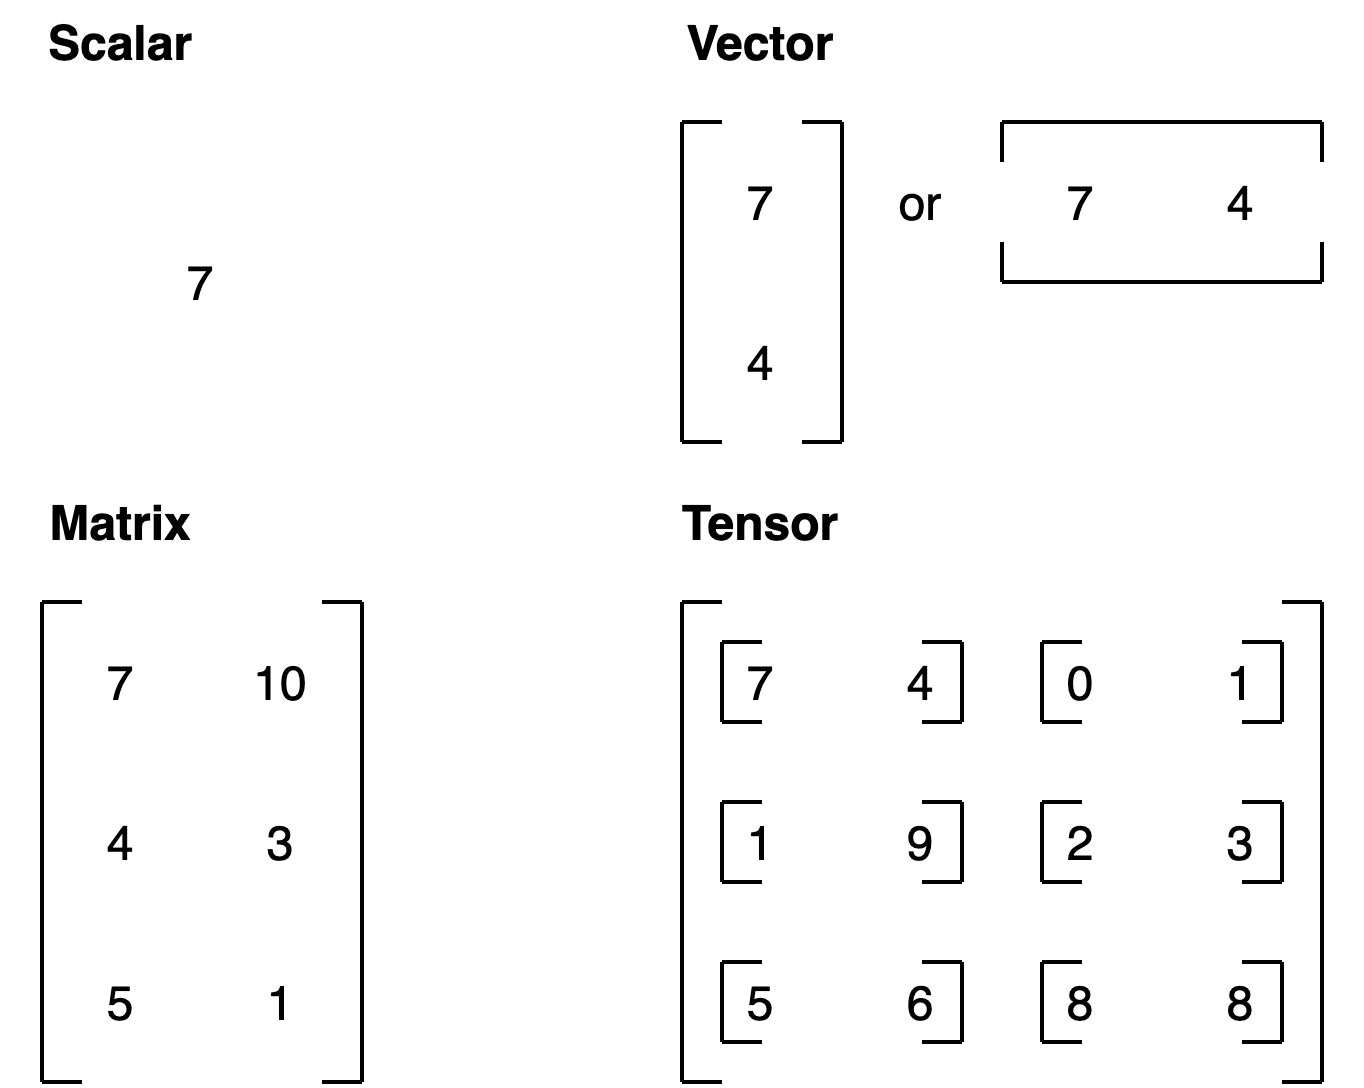))##What is TensorFlow:

[What is TensorFlow](https://www.youtube.com/watch?v=9NsfX9W80rw&t=1s)

[TensorFlow](https://www.tensorflow.org/) is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others)

###Why use TensorFlow?

Rather than building machine learning and deep learning models from scratch, it's more likely you'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions you'll want to use.




##Introduction to Tensors

[Tensors](https://www.tensorflow.org/guide/tensor) are kind of like NumPy arrays...

You can think of a tensor as a multi-dimensional numerical representation (also referred to as n-dimensional, where n can be any number) of something. Where something can be almost anything you can imagine:

- It could be numbers themselves (using tensors to represent the price of houses)
- It could be an image (using tensors to represent the pixels of an image)
- It could be text (using tensors to represent words)
- Or it could be some other form of information (or data) you want to represent with numbers

The main difference between tensors and NumPy arrays (also an n-dimensional array of numbers) is that tensors can be used on GPUs (graphical processing units) and TPUs (tensor processing units)

The benefit of being able to run on GPUs and TPUs is faster computation, this means, if we wanted to find patterns in the numerical representations of our data, we can generally find them faster using GPUs and TPUs

Okay, we've been talking enough about tensors, let's see them.

The first thing we'll do is import TensorFlow under the common alias `tf`:


In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__) # find the version number (should be 2.x+)

2.15.0


##Creating Tensors with `tf.constant()`

As mentioned before, in general, you usually won't create tensors yourself. This is because TensorFlow has modules built-in (such as tf.io and tf.data) which are able to read your data sources and automatically convert them to tensors and then later on, neural network models will process these for us.

But for now, because we're getting familar with tensors themselves and how to manipulate them, we'll see how we can create them ourselves.

We'll begin by using `tf.constant()`:

In [ ]:
# Create a scalar (rank 0 tensor)
scalar = tf.constant(7)
scalar
#A scalar is known as a rank 0 tensor. Because it has no dimensions (it's just a number)

<tf.Tensor: shape=(), dtype=int32, numpy=7>

     Note: For now, you don't need to know too much about the different ranks of tensors
     The important point is knowing tensors can have an unlimited range of dimensions
     (the exact amount will depend on what data you're representing)

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the number of dimensions of our vector tensor
vector.ndim

1

In [ ]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

    By default, TensorFlow creates tensors with either an int32 or float32 datatype

  This is known as [32-bit precision](https://en.wikipedia.org/wiki/Precision_(computer_science) (the higher the number, the more precise the number, the more space it takes up on your computer)

In [ ]:
# Create another matrix and define the datatype
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the datatype with 'dtype'
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# Even though another_matrix contains more numbers, its dimensions stay the same
another_matrix.ndim

2

In [ ]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

This is known as a rank 3 tensor (3-dimensions), however a tensor can have an arbitrary (unlimited) amount of dimensions.

For example, you might turn a series of images into tensors with shape (224, 224, 3, 32), where:

- 224, 224 (the first 2 dimensions) are the height and width of the images in pixels.
- 3 is the number of colour channels of the image (red, green blue).
- 32 is the batch size (the number of images a neural network sees at any one time).

All of the above variables we've created are actually tensors. But you may also hear them referred to as their different names (the ones we gave them):

- **scalar**: a single number.
- **vector**: a number with direction (e.g. wind speed with direction).
- **matrix**: a 2-dimensional array of numbers.
- **tensor**: an n-dimensional arrary of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector).

To add to the confusion, the terms matrix and tensor are often used interchangably.

Going forward since we're using TensorFlow, everything we refer to and use will be tensors.

For more on the mathematical difference between scalars, vectors and matrices see the [visual algebra post by Math is Fun](https://www.mathsisfun.com/algebra/scalar-vector-matrix.html).


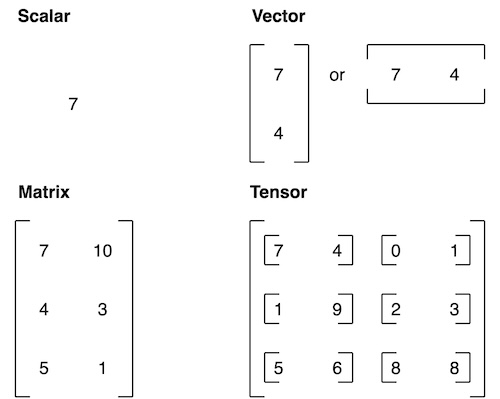

##Creating Tensors with `tf.Variable()`

You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using `tf.Variable()`.

The difference between `tf.Variable()` and `tf.constant()` is tensors created with `tf.constant()` are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with `tf.Variable()` are mutable (can be changed).

In [ ]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Will error (requires the .assign() method)
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

To change an element of a `tf.Variable()` tensor requires the `assign()` method

In [ ]:
# Won't error
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

Now let's try to change a value in a `tf.constant()` tensor

In [ ]:
# Will error (can't change tf.constant())
unchangeable_tensor[0].assign(7)
unchangleable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

Which one should you use? `tf.constant()` or `tf.Variable()`?

It will depend on what your problem requires

However, most of the time, TensorFlow will automatically choose for you (when loading data or modelling data)

##Creating random tensors

Random tensors are tensors of some abitrary size which contain random numbers.

Why would you want to create random tensors?

**This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data**

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data)


We can create random tensors by using the `tf.random.Generator` class


In [ ]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set the seed for reproducibility
random_1 = random_1.normal(shape=(3, 2)) # create tensor from a normal distribution
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

The random tensors we've made are actually [pseudorandom numbers](https://www.computerhope.com/jargon/p/pseudo-random.htm) (they appear as random, but really aren't).

If we set a seed we'll get the same random numbers (if you've ever used NumPy, this is similar to `np.random.seed(42)`).

Setting the seed says, "hey, create some random numbers, but flavour them with X" (X is the seed).

What do you think will happen when we change the seed?

In [ ]:
# Create two random (and different) tensors
random_3 = tf.random.Generator.from_seed(42)
random_3 = random_3.normal(shape=(3, 2))
random_4 = tf.random.Generator.from_seed(11)
random_4 = random_4.normal(shape=(3, 2))

# Check the tensors and see if they are equal
random_3, random_4, random_1 == random_3, random_3 == random_4

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.27305737, -0.29925638],
        [-0.3652325 ,  0.61883307],
        [-1.0130816 ,  0.28291714]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)

What if you wanted to shuffle the order of a tensor?

Wait, why would you want to do that?

Let's say you working with 15,000 images of cats and dogs and the first 10,000 images of were of cats and the next 5,000 were of dogs. This order could effect how a neural network learns (it may overfit by learning the order of the data), instead, it might be a good idea to move your data around.

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Shuffle in the same order every time using the seed parameter (won't acutally be the same)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

why didn't the numbers come out the same?

It's due to rule #4 of the `tf.random.set_seed()` documentation.

    "4. If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

`tf.random.set_seed(42)` sets the global seed, and the seed parameter in tf.`random.shuffle(seed=42)` sets the operation seed.

Because, "Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed."

In [ ]:
# Shuffle in the same order every time

# Set the global random seed
tf.random.set_seed(42)

# Set the operation random seed
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
# Set the global random seed
tf.random.set_seed(42) # if you comment this out you'll get different results

# Set the operation random seed
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

##Other ways to make tensors

Though you might rarely use these (remember, many tensor operations are done behind the scenes for you), you can use `tf.ones()` to create a tensor of all ones and `tf.zeros()` to create a tensor of all zeros.

In [ ]:
# Make a tensor of all ones
tf.ones(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# Make a tensor of all zeros
tf.zeros(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

###You can also turn NumPy arrays in into tensors.

Remember, the main difference between tensors and NumPy arrays is that tensors can be run on GPUs (faster processing).

    🔑 Note: A matrix or tensor is typically represented
    by a capital letter (e.g. X or A) where as a vector is typically represented by a lowercase letter (e.g. y or b)

In [ ]:
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25, without indicating the shape
A = tf.constant(numpy_A,
                shape=[2, 4, 3]) # note: the shape total (2*4*3) has to match the number of elements in the array
numpy_A, A

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32),
 <tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],
 
        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]]], dtype=int32)>)

##Getting information from tensors (shape, rank, size)

There will be times when you'll want to get different pieces of information from your tensors, in particuluar, you should know the following tensor vocabulary:

- **Shape**: The length (number of elements) of each of the dimensions of a tensor.
- **Rank**: The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n.
- **Axis or Dimension**: A particular dimension of a tensor.
- **Size**: The total number of items in the tensor.

You'll use these especially when you're trying to line up the shapes of your data to the shapes of your model. For example, making sure the shape of your image tensors are the same shape as your models input layer.

We've already seen one of these before using the `ndim` attribute. Let's see the rest.

In [ ]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Get various attributes of tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy()) # .numpy() conve

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120


##Indexing Tensors

You can also index tensors just like Python lists

In [ ]:
# Get the first 2 items of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])

# Get the last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

You can also add dimensions to your tensor whilst keeping the same information present using `tf.newaxis`

In [ ]:
# Add an extra dimension (to the end)
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # in Python "..." means "all dimensions prior to"
rank_2_tensor, rank_3_tensor # shape (2, 2), shape (2, 2, 1)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]], dtype=int32)>)

In [ ]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means last axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>